In [353]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### 1. Dataset

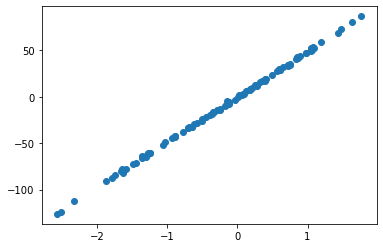

In [354]:
x, y = make_regression(n_samples=100,n_features=1,noise = 1)
plt.scatter(x,y)

In [355]:
print(x.shape)
Y = y.reshape(y.shape[0],1)
print(Y.shape)


(100, 1)
(100, 1)


In [356]:
#matrice X
X = np.hstack((x,np.ones(x.shape)))
print(X)
print(X.shape)

[[-0.88661827  1.        ]
 [-1.25045057  1.        ]
 [-0.36635683  1.        ]
 [ 0.85166059  1.        ]
 [ 0.18493086  1.        ]
 [ 0.28127728  1.        ]
 [-1.36070693  1.        ]
 [ 0.07365867  1.        ]
 [-1.64653769  1.        ]
 [ 0.60377443  1.        ]
 [-1.75112212  1.        ]
 [-0.57195521  1.        ]
 [ 0.34539098  1.        ]
 [-1.87244751  1.        ]
 [-1.02928347  1.        ]
 [ 0.71497991  1.        ]
 [-0.8849893   1.        ]
 [-0.7092701   1.        ]
 [-0.11409712  1.        ]
 [-0.34376504  1.        ]
 [ 0.39969242  1.        ]
 [ 1.04572109  1.        ]
 [-1.36182305  1.        ]
 [ 0.31948478  1.        ]
 [-1.0688498   1.        ]
 [-0.3296999   1.        ]
 [-0.89648038  1.        ]
 [ 0.12855196  1.        ]
 [ 0.97939128  1.        ]
 [-1.2403779   1.        ]
 [-0.14055181  1.        ]
 [-1.58856174  1.        ]
 [ 1.07877898  1.        ]
 [ 0.74611726  1.        ]
 [ 0.83716906  1.        ]
 [ 1.06258692  1.        ]
 [ 1.63824651  1.        ]
 

In [357]:
theta = np.random.randn(2,1)
print(theta)
print(theta.shape)


[[ 0.39701892]
 [-0.50111975]]
(2, 1)


### 2. Modèle linéaire

In [358]:
def model(X,theta):
    return X.dot(theta)

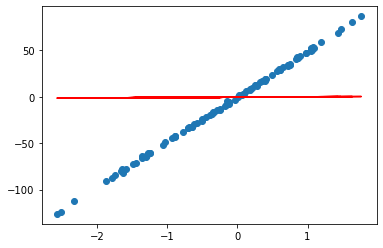

In [359]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c = 'r')

### 3. Fonction coût

In [360]:
def cost_function(X,Y,theta):
    m = len(Y)
    return 1/(2*m) * np.sum((model(X,theta) - Y) **2)

In [361]:
cost_function(X,Y,theta)

1168.191425477929

### 4. Gradients et Descente de Gradient

In [362]:
def grad(X,Y,theta):
    m = len (Y)
    return 1/m * X.T.dot(model(X,theta) - Y)


In [363]:
def gradient_descent(X,Y,theta,learning_rate,n_iterations):

    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta =  theta - learning_rate * grad(X,Y,theta)
        cost_history[i] = cost_function(X,Y,theta)
    return theta,cost_history


### 5. Entraînement du modèle

In [364]:
theta_final,cost_history = gradient_descent(X,Y,theta,learning_rate = 0.01,n_iterations = 1000)
theta_final

array([[48.62470606],
       [-0.13138694]])

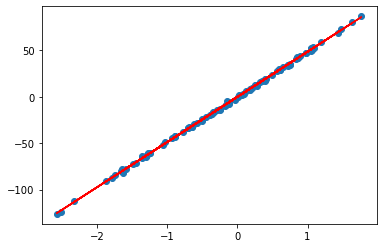

In [365]:
predictions = model (X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c = 'r')




### 6. Courbe d'apprentissage

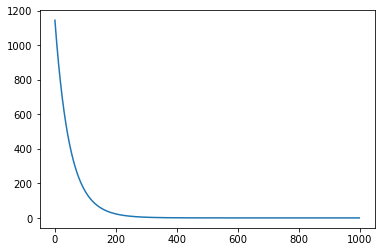

In [366]:
plt.plot(range(1000),cost_history)

### 7. Coefficient de détermination

In [367]:
def coef_determination(Y,predictions):
    u = ((Y - predictions)**2).sum() # résidu de la somme des carrés 
    v = ((Y - Y.mean())**2).sum() # somme totale des carrés
    return 1 - u/v
 

In [368]:
coef_determination(Y,predictions)


0.9995518022865278